NLP에서의 원-핫 인코딩(One-hot encoding)  

- 단어 집합(vocabulary)  
    - 서로 다른 단어들의 집합
    - 단어 집합은 book과 books와 같이 단어의 변형 형태도 다른 단어로 간주함
- 원-핫 인코딩을 위해서 단어 집합을 먼저 만들어야 함. 
- 텍스트의 모든 단어를 중복을 허용하지 않고 모아놓으면 이를 단어 집합이라고 함
- 이 단어 집합에 고유한 숫자를 부여하는 정수 인코딩을 진행함. 
    - 텍스트에 단어가 총 5000개가 존재한다면, 단어 집합의 크기는 5000 
    - 5000개의 단어가 있는 단어 집합의 단어들마다 1부터 인덱스를 부여한다고 할때, book은 150번, dog는 171번, books는 212번과 같이 부여할 수 있음
- 각 단어에 고유한 정수 인덱스를 부여하고 이 단어들을 벡터로 다루고 싶을 대 인코딩 기법을 사용

원-핫 인코딩(One-hot encoding)  
- 단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 단어의 벡터 표현 방식
- 이렇게 표현된 벡터를 원-핫 벡터(One-hot vector)라고 함

- 과정 
    1. 각 단어에 고유한 인덱스를 부여 (정수 인코딩)
    2. 표현하고 싶은 단어의 인덱스의 위치에 1을, 다른 단어의 인덱스의 위치에 0을 부여함


In [7]:
from konlpy.tag import Okt  
okt = Okt()

# 토큰화
token = okt.morphs("나는 자연어 처리를 배운다")  
print('token : ', token)

word2index = {}
for voca in token:
    if voca not in word2index.keys():
        word2index[voca] = len(word2index)
print('word2index : ', word2index)

def one_hot_encoding(word, word2index):
    one_hot_vector = [0] * (len(word2index))
    index = word2index[word]
    one_hot_vector[index] = 1
    return one_hot_vector

print('"자연어" one_hot_encoding:',one_hot_encoding("자연어", word2index))

token :  ['나', '는', '자연어', '처리', '를', '배운다']
word2index :  {'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4, '배운다': 5}
"자연어" one_hot_encoding: [0, 0, 1, 0, 0, 0]


원-핫 인코딩(One-hot encoding)의 한계  
- 단어의 개수가 늘어날 수록 벡터의 차원이 늘어나는 단점이 있음
- 원 핫 벡터는 단어 집합의 크기가 벡터의 차원 수가 됨
    - 단어가 1000개인 코퍼스를 가지고 원 핫 벡터를 만들면, 모든 단어 각각은 1000개의 차원을 가진 벡터가 됨. 모든 단어 각각은 하나의 값만 1이고 999개는 0값을 가지는 벡터가 되는데 이는 저장 공간 측면에서는 매우 비효율적인 표현 방법임
- 단어의 유사도를 표현하지 못한다는 단점이 있음 
    - 늑대, 호랑이, 강아지, 고양이라는 4개의 단어에 대해서 각각, [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]이라는 원-핫 벡터를 인코딩 했을 때 강아지와 늑대가 유사하고, 호랑이와 고양이가 유사하다는 것을 표현할 수가 없음

원-핫 인코딩(One-hot encoding)의 한계  
- 단어의 개수가 늘어날 수록 벡터의 차원이 늘어나는 단점이 있음
- 원 핫 벡터는 단어 집합의 크기가 벡터의 차원 수가 됨
    - 단어가 1000개인 코퍼스를 가지고 원 핫 벡터를 만들면, 모든 단어 각각은 1000개의 차원을 가진 벡터가 됨. 모든 단어 각각은 하나의 값만 1이고 999개는 0값을 가지는 벡터가 되는데 이는 저장 공간 측면에서는 매우 비효율적인 표현 방법임
- 단어의 유사도를 표현하지 못한다는 단점이 있음 
    - 늑대, 호랑이, 강아지, 고양이라는 4개의 단어에 대해서 각각, [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]이라는 원-핫 벡터를 인코딩 했을 때 강아지와 늑대가 유사하고, 호랑이와 고양이가 유사하다는 것을 표현할 수가 없음

워드 임베딩(Word Embedding)  
- 단어를 벡터로 표현하는 것(단어를 밀집 표현으로 변환하는 방법)  

희소 표현(Sparse Representation)  
- 원-핫 인코딩을 통해서 나온 벡터 또는 행렬(matrix)의 값이 대부분이 0으로 표현되는 방법
- 희소 벡터(sparse vector)

In [9]:
import torch

# one-hot vector 생성
dog = torch.FloatTensor([1, 0, 0, 0, 0])
cat = torch.FloatTensor([0, 1, 0, 0, 0])
computer = torch.FloatTensor([0, 0, 1, 0, 0])
netbook = torch.FloatTensor([0, 0, 0, 1, 0])
book = torch.FloatTensor([0, 0, 0, 0, 1])

# ont-hot vector 간 cosine 유사도 출력
print(torch.cosine_similarity(dog, cat, dim=0))
print(torch.cosine_similarity(cat, computer, dim=0))
print(torch.cosine_similarity(computer, netbook, dim=0))
print(torch.cosine_similarity(netbook, book, dim=0))

tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)


사람이 판단하기에 강아지와 고양이라는 단어의 유사도는 고양이와 컴퓨터보다 높을 것이며, 컴퓨터와 넷북의 단어 유사도는 넷북과 책보다는 높을 것 같지만 모든 유사도가 동일한다는 단점이 존재함

밀집 표현(Dense Representation)  
- 희소 표현과 반대되는 표현
- 사용자가 설정한 값으로 모든 단어의 벡터 표현의 차원을 맞춤
    - 강아지 = [ 0 0 1 ... 0] # 1 뒤의 0의 수는 9995개. 차원은 10000
    - 밀집 표현의 차원을 128로 설정하면 모든 단어의 벡터 표현의 차원은 128로 바뀌면서 모든 값이 실수가 됨
        - 강아지 = [0.2 1.8 1.1 -2.1 1.1 2.8 ... 중략 ...] # 차원은 128
    - 이 경우 벡터의 차원이 조밀해졌다고 하여 밀집 벡터(dense vector)라고 함

워드 임베딩(Word Embedding)  
- 단어를 밀집 벡터(dense vector)의 형태로 표현하는 방법
- 이 밀집 벡터를 워드 임베딩 과정을 통해 나온 결과라고 하여 임베딩 벡터(embedding vector)라고도 함

분산 표현(Distributed Representation)  
- '비슷한 위치에 등장하는 단어들은 비슷한 의미를 가진다'라는 분포 가설이라는 가정 하에 만들어진 표현방법
    - 강아지란 단어는 귀엽다, 예쁘다, 애교 등의 단어가 주로 함께 등장하는데 분포 가설에 따라서 저런 내용을 가진 텍스트를 벡터화한다면 저 단어들은 의미적으로 가까운 단어가 됨
- 분산 표현은 분포 가설을 이용하여 단어들의 셋을 학습하고 벡터에 단어의 의미를 여러 차원에 분산하여 표현함
    - 단어 간 유사도를 계산할 수 있음
    - 이를 위한 학습 방법으로 Word2Vec가 많이 쓰이고 있음

CBOW(Continuous Bag of Words)  
- 주변에 있는 단어들을 가지고 중간에 있는 단어들을 예측하는 방법
- 예문 : "The fat cat sat on the mat"
    - 가운데 단어를 예측하는 것이 CBOW.
    - {"The", "fat", "cat", "on", "the", "mat"}으로부터 sat을 예측하는 것은 CBOW가 하는 일
    - 이 때 예측해야하는 단어 sat을 중심 단어(center word)라고 하고 예측에 사용되는 단어들을 주변 단어(context word)라고 함
- 중심 단어를 예측하기 위해 앞,뒤로 몇 개의 단어를 볼지 결정했다면 이 범위를 윈도우(window)라고 함
    - 윈도우 크기가 2이고, 예측하고자 하는 중심 단어가 sat이라고 한다면 앞의 두 단어인 fat와 cat, 그리고 뒤의 두 단어인 on, the를 참고함
    - 윈도우 크기가 n이면 실제 중심 단어를 예측하기 위해 참고하려고 하는 주변 단어의 개수는 2n
- 윈도우 크기를 정했다면 해당 윈도우를 계속 움직여서 주변 단어와 중심 단어 선택을 바꿔가며 학습을 위한 데이터 셋을 만들 수 있는데, 이 방법을 슬라이딩 윈도우(sliding window)라고 함  

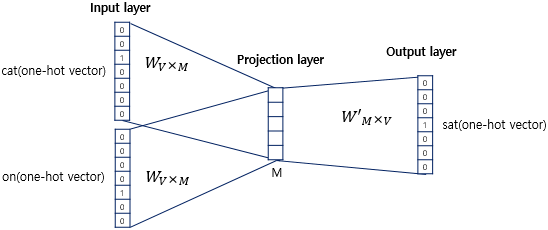  

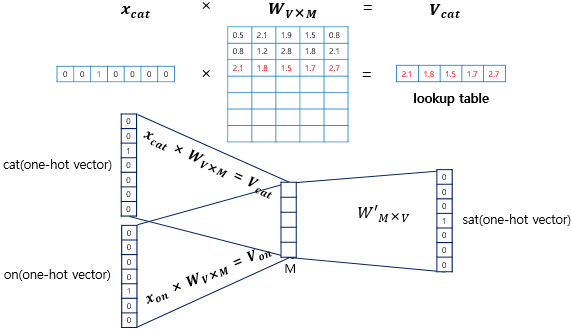  

- 입력층(Input layer)의 입력으로서 앞, 뒤로 사용자가 정한 윈도우 크기 범위 안에 있는 주변 단어들의 원-핫 벡터가 들어감
- 출력층(Output layer)에서 예측하고자 하는 중간 단어의 원-핫 벡터가 필요함
    - Word2Vec의 학습을 위해서 중간 단어의 원-핫 벡터가 필요함
- Word2Vec의 은닉층은 일반적인 은닉층과는 달리 활성화 함수가 존재하지 않으며 룩업 테이블이라는 연산을 담당하는 층으로 일반적인 은닉층과 구분하기 위해 투사층(projection layer)이라고 부르기도 함
- CBOW에서 투사층의 크기 M은 임베딩하고 난 벡터의 차원이 됨. 위의 그림에서 투사층의 크기는 M=5이기 때문에 CBOW를 수행하고나서 얻는 각 단어의 임베딩 벡터의 차원은 5가 됨
- 입력층과 투사층 사이의 가중치 W는 V × M 행렬이며, 투사층에서 출력층사이의 가중치 W'는 M × V 행렬.
    - V : 단어 집합의 크기.
    - 원-핫 벡터의 차원이 7이고, M은 5라면 가중치 W는 7 × 5 행렬이고 W'는 5 × 7 행렬
    - 이 두 행렬은 동일한 행렬을 전치(transpose)한 것이 아니라, 서로 다른 행렬이라는 점이며, 인공 신경망의 훈련 전에 이 가중치 행렬 W와 W'는 대게 굉장히 작은 랜덤 값을 가지게 됨.
- CBOW는 주변 단어로 중심 단어를 더 정확히 맞추기 위해 계속해서 이 W와 W'를 학습해가는 구조  
- 룩업 테이블(lookup table)
    - 입력 벡터는 원-핫 벡터이며, i번째 인덱스에 1값을 가지고 나머지는 0값을 가지는 입력 벡터와 가중치 W 행렬의 곱은 W행렬의 i번째 행을 그대로 읽어오는 것과(lookup) 동일함
    - 앞서 CBOW의 목적은 W와 W'를 잘 훈련시키는 것이라고 했는데, 그 이유가 여기서 lookup해온 W의 각 행벡터가 Word2Vec을 수행한 후의 각 단어의 M차원의 크기를 갖는 임베딩 벡터들이기 때문임  

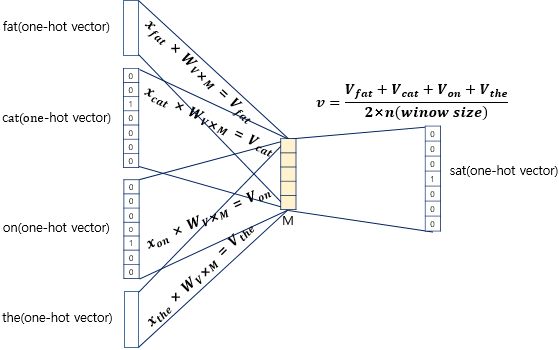  

- 각 주변 단어의 원-핫 벡터에 대해서 가중치 W가 곱해서 생겨진 결과 이 벡터들의 평균인 벡터를 구하게 됨
- 윈도우 크기가 2라면, 입력 벡터의 총 개수는 2n이므로 중간 단어를 예측하기 위해서는 총 4개가 입력 벡터로 사용됨
- 그렇기 때문에 평균을 구할 때는 4개의 결과 벡터에 대해서 평균을 구하게 됨

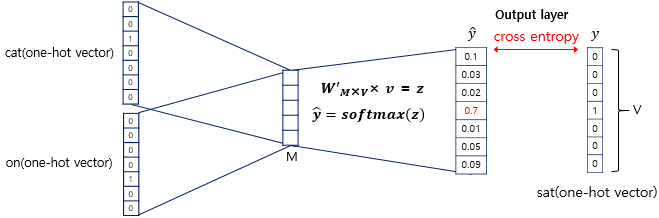  

- 이렇게 구해진 평균 벡터는 두번째 가중치 행렬 W'와 곱해짐. 곱셈의 결과로는 원-핫 벡터들과 차원이 V로 동일한 벡터가 나옴.
- 이 벡터에 CBOW는 소프트맥스(softmax) 함수를 취하는데, 소프트맥스 함수로 인한 출력값은 0과 1사이의 실수로, 각 원소의 총 합은 1이 되는 상태로 바뀜
    - 이 벡터를 스코어 벡터(score vector)라고 함
    - 스코어 벡터의 j번째 인덱스가 가진 0과 1사이의 값은 j번째 단어가 중심 단어일 확률을 나타냄. 
    - 이 스코어 벡터는 우리가 실제로 값을 알고있는 벡터인 중심 단어 원-핫 벡터의 값에 가까워져야 함.

Skip-gram  
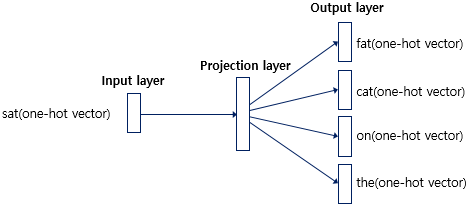  
- 중심 단어에서 주변 단어를 예측하려고 함
- 투사층에서 벡터들의 평균을 구하는 과정이 필요없음

파이토치(PyTorch)의 nn.Embedding()  
- 임베딩 층(embedding layer)을 만들어 훈련 데이터로부터 처음부터 임베딩 벡터를 학습하는 방법
- 임베딩 층의 입력으로 사용하기 위해서 입력 시퀀스의 각 단어들은 모두 정수 인코딩이 되어있어야 함
- 어떤 단어 → 단어에 부여된 고유한 정수값 → 임베딩 층 통과 → 밀집 벡터
    - 임베딩 층은 입력 정수에 대해 밀집 벡터(dense vector)로 맵핑
    - 이 밀집 벡터는 인공 신경망의 학습 과정에서 가중치가 학습되는 것과 같은 방식으로 훈련됨
    - 훈련 과정에서 단어는 모델이 풀고자하는 작업에 맞는 값으로 업데이트 됨
    - 이 밀집 벡터를 임베딩 벡터라고 부름
- 정수를 밀집 벡터 또는 임베딩 벡터로 맵핑한다는 의미
    - 특정 단어와 맵핑되는 정수를 인덱스로 가지는 테이블로부터 임베딩 벡터 값을 가져오는 룩업 테이블
    - 이 테이블은 단어 집합의 크기만큼의 행을 가지므로 모든 단어는 고유한 임베딩 벡터를 가짐

- 파이토치는 단어를 정수 인덱스로 바꾸고 원-핫 벡터로 한번 더 바꾸고나서 임베딩 층의 입력으로 사용하는 것이 아니라, 단어를 정수 인덱스로만 바꾼채로 임베딩 층의 입력으로 사용해도 룩업 테이블 된 결과인 임베딩 벡터를 리턴함

In [1]:
# 룩업 테이블 과정
# 임의의 문장으로부터 단어 집합을 만들고 각 단어에 정수 부여
train_data = 'you need to know how to code'

# 중복을 제거한 단어들의 집합인 단어 집합 생성
word_set = set(train_data.split())

# 단어 집합의 각 단어에 고유한 정수 맵핑
vocab = {word: i+2 for i, word in enumerate(word_set)}
vocab['<unk>'] = 0
vocab['<pad>'] = 1
print(vocab)

{'need': 2, 'how': 3, 'know': 4, 'code': 5, 'you': 6, 'to': 7, '<unk>': 0, '<pad>': 1}


In [3]:
# 단어 집합의 크기를 행으로 가지는 임베딩 테이블 구현
import torch
embedding_table = torch.FloatTensor([
    [0.0,  0.0,  0.0],
    [0.0,  0.0,  0.0],
    [0.2,  0.9,  0.3],
    [0.1,  0.5,  0.7],
    [0.2,  0.1,  0.8],
    [0.4,  0.1,  0.1],
    [0.1,  0.8,  0.9],
    [0.6,  0.1,  0.1]])

In [4]:
sample = 'you need to run'.split()
idxes = []

# 각 단어를 정수로 변환
for word in sample:
    try:
        idxes.append(vocab[word])
    # 단어 집합에 없는 단어는 <unk>로 대체.
    except KeyError:
        idxes.append(vocab['<unk>'])
idxes = torch.LongTensor(idxes)

# 각 정수를 인덱스로 임베딩 테이블에서 값을 가져옴
lookup_result = embedding_table[idxes, :]
lookup_result

tensor([[0.1000, 0.8000, 0.9000],
        [0.2000, 0.9000, 0.3000],
        [0.6000, 0.1000, 0.1000],
        [0.0000, 0.0000, 0.0000]])

In [5]:
# nn.Embedding() 사용
train_data = 'you need to know how to code'

word_set = set(train_data.split())

vocab = {tkn: i+2 for i, tkn in enumerate(word_set)}
vocab['<unk>'] = 0
vocab['<pad>'] = 1

In [11]:
import torch.nn as nn

# num_embeddings : 임베딩을 할 단어들의 개수. 단어 집합의 크기
# embedding_dim : 임베딩 할 벡터의 차원. 하이퍼파라미터
# padding_idx : 패딩을 위한 토큰의 인덱스.
embedding_layer = nn.Embedding(
    num_embeddings=len(vocab), embedding_dim=3, padding_idx=1)
print('embedding_layer : ', embedding_layer)
print('embedding_layer.weight : ', embedding_layer.weight)

embedding_layer :  Embedding(8, 3, padding_idx=1)
embedding_layer.weight :  Parameter containing:
tensor([[ 0.2486,  2.0269,  0.7595],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.3219, -1.1715, -0.0327],
        [ 0.0841, -0.2629, -2.4186],
        [-0.2496, -1.8790,  0.5001],
        [-0.7636,  0.1932, -0.4817],
        [ 0.8627, -0.1714, -0.6581],
        [-1.2141, -1.3884, -0.0438]], requires_grad=True)


사전 훈련된 워드 임베딩(Pretrained Word Embedding)  

In [12]:
# IMDB 리뷰 데이터를 훈련 데이터로 사용
from torchtext.legacy import data, datasets

TEXT = data.Field(sequential=True, batch_first=True, lower=True)
LABEL = data.Field(sequential=False, batch_first=True)

# IMDB 데이터셋 로드
trainset, testset = datasets.IMDB.splits(TEXT, LABEL)
print('train data size : ', len(trainset))
print(vars(trainset[0]))

downloading aclImdb_v1.tar.gz


aclImdb_v1.tar.gz: 100%|██████████| 84.1M/84.1M [01:22<00:00, 1.02MB/s]


train data size :  25000
{'text': ['teresa', 'pavlinek', 'was', 'a', 'popular', 'member', 'of', 'the', 'toronto', 'second', 'city', 'cast.', 'she', 'has', 'done', 'numerous', 'guest', 'spots', 'and', 'commercials', 'up', 'here', 'in', 'canada.', 'finally', 'someone', 'has', 'the', 'sense', 'to', 'create', 'a', 'show', 'for', 'her.', 'the', 'supporting', 'case', 'seems', 'quite', 'good', 'too.', 'i', 'have', 'now', 'watched', 'the', 'pilot', 'several', 'times', 'and', 'i', 'still', 'find', 'it', 'refreshing.', 'though,', 'i', 'am', 'not', 'sure', 'why', 'the', 'show', 'is', 'listed', 'as', 'the', 'jane', 'show', '2004.', '(i', 'might', 'be', 'wrong)', 'but', 'as', 'far', 'as', 'i', 'am', 'aware,', 'the', 'show', 'was', 'conceptualized', 'in', '2005', 'and', 'appeared', 'on', 'global', 'tv', 'in', 'canada', 'in', 'early', '2006.', 'it', 'is', 'a', 'fresh', 'idea', 'and', 'hopefully', 'it', 'does', 'well.', 'too', 'bad', 'this', "couldn't", 'be', 'paired', 'up', 'with', 'corner', 'gas.', 

In [24]:
from torchtext.vocab import GloVe

TEXT.build_vocab(
    trainset, vectors=GloVe(name='6B', dim=300), max_size=10000, min_freq=10)
LABEL.build_vocab(trainset)
# print(TEXT.vocab.stoi)

In [15]:
print('embedding vector shape : ', TEXT.vocab.vectors.shape)

embedding vector shape :  torch.Size([10002, 300])


In [19]:
print('<unk> 벡터 값 : ', TEXT.vocab.vectors[0])
print('<pad> 벡터 값 : ', TEXT.vocab.vectors[1])
print('this 단어 벡터 값 : ', TEXT.vocab.vectors[10])
# 사전 훈련된 임베딩 벡터에 'self-indulgent'가 없으므로 0으로 초기화 되어 있음
print('self-indulgent 단어 벡터 값 : ', TEXT.vocab.vectors[9999])

<unk> 벡터 값 :  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [22]:
# nn.Embedding()의 초기화 값 입력
embedding_layer = nn.Embedding.from_pretrained(TEXT.vocab.vectors, freeze=False)
embedding_layer(torch.LongTensor([10])) # this 단어의 벡터 값

tensor([[-2.0437e-01,  1.6431e-01,  4.1794e-02, -1.3708e-01, -2.9779e-01,
          3.3440e-01, -6.9955e-02, -6.8036e-02,  1.0604e-01, -2.0337e+00,
          1.7977e-01, -7.7403e-02, -1.9518e-01,  1.8324e-01,  3.0017e-02,
         -5.4762e-02, -4.5725e-01, -2.4509e-02,  5.7387e-02, -3.4878e-01,
          3.9696e-02,  4.4826e-01, -5.8462e-02,  4.1181e-01, -3.5411e-02,
         -1.4722e-01,  1.0740e-01, -2.5896e-01, -1.1658e-01,  1.9822e-01,
          3.2850e-01,  2.4177e-01, -5.7177e-01, -5.6442e-02, -9.6437e-01,
          3.4482e-01,  5.4639e-02,  2.3828e-01, -1.9139e-01,  3.0899e-01,
          2.8044e-01, -3.3814e-02, -2.5436e-01,  1.5373e-02,  1.6341e-01,
          2.6352e-01,  1.5812e-01,  3.2044e-01, -2.3082e-01,  2.6050e-01,
          2.0606e-01, -8.9769e-02, -1.0055e-01,  7.0378e-02, -2.7452e-02,
          2.7959e-01, -9.5862e-02,  2.0574e-01,  2.9522e-01, -1.2285e-02,
          1.1164e-01, -5.1373e-02,  4.6106e-01,  2.3014e-02, -3.7141e-01,
         -2.4166e-01,  3.3773e-02,  3.